<img src="./img/DisF.png"></img>
<img src="./img/CDF.png"></img>
<img src="./img/EX.png"></img>

If the points represent mass, then the zeroth moment is the total mass, the first moment divided by the total mass is the center of mass, and the second moment is the rotational inertia. If the points represent probability density, then the zeroth moment is the total probability (i.e. one), the first moment is the mean, the second central moment is the variance, the third central moment is the skewness, and the fourth central moment (with normalization and shift) is the kurtosis.

The moment:
<img src="./img/moment.png"></img>

The central moment:
<img src="./img/central_moment.png"></img>


In [115]:
import scipy
scipy.__version__

'0.19.0'

(array(0.01), array(4.0), array(0.0), array(0.0))
True


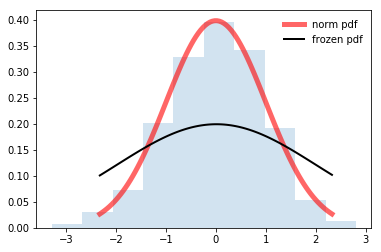

In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(1, 1)
print (norm(0.01, 2).stats(moments='mvsk')) # mean, var, skew, kurt
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm(0.01, 2)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
print (np.allclose([0.001, 0.5, 0.999], norm.cdf(vals)))

r = norm.rvs(size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

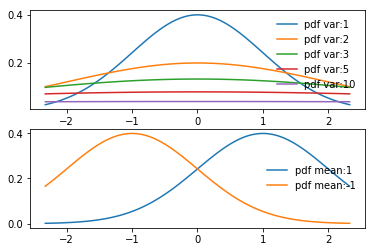

In [16]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

plt.subplot(211)
for var in [1,2,3,5,10]:
    rv = norm(0, var)
    plt.plot(x, rv.pdf(x), label='pdf var:' + str(var))

plt.legend(loc='best', frameon=False)
plt.subplot(212)
for mean in [1,-1]:
    rv = norm(mean, 1)
    plt.plot(x, rv.pdf(x), label='pdf mean:' + str(mean))

plt.legend(loc='best', frameon=False)
plt.show()

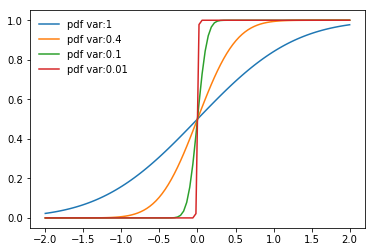

In [41]:
x = np.linspace(-2, 2, 100)

for var in [1,0.4,0.1,0.01]:
    rv = norm(0, var)
    plt.plot(x, rv.cdf(x), label='pdf var:' + str(var))

plt.legend(loc='best', frameon=False)

In [44]:
norm.rvs(1) # Random variates.

0.34945542720497835

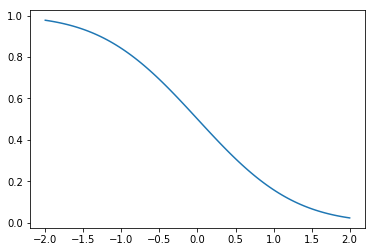

In [45]:
x = np.linspace(-2, 2, 100)

rv = norm(0, 1)
plt.plot(x, rv.sf(x), label='pdf var:' + str(var))

<img src="./img/Discrete.png"></img>


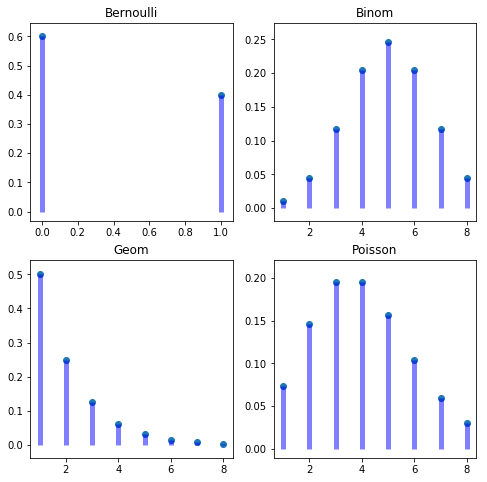

In [68]:
from scipy.stats import poisson, geom, binom, bernoulli
x = np.linspace(-2, 2, 100)
#probability mass function (pmf):

plt.figure(figsize=(8,8))
plt.subplot(221)
rv = bernoulli(0.4)
plt.title("Bernoulli")
plt.scatter([0,1], rv.pmf([0,1]), label='pdf var:' + str(var))
plt.vlines([0,1], 0, rv.pmf([0,1]), colors='b', lw=5, alpha=0.5)

plt.subplot(222)
rv = binom(10,0.5)
plt.title("Binom")
x = np.arange(rv.ppf(0.01), rv.ppf(0.99))
plt.scatter(x, rv.pmf(x), label='pdf var:' + str(var))
plt.vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)

plt.subplot(223)
rv = geom(0.5)
plt.title("Geom")
plt.scatter(x, rv.pmf(x), label='pdf var:' + str(var))
plt.vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)

plt.subplot(224)
rv = poisson(4) # the amount of customer which will come in certain amount of time
plt.title("Poisson")
plt.scatter(x, rv.pmf(x), label='pdf var:' + str(var))
plt.vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)


In [90]:
rv = poisson(4)
print (rv.rvs(10))
print (rv.stats())
print (rv.moment(3))

[3 6 5 2 2 6 4 6 9 7]
(array(4.0), array(4.0))
116.0


<img src="./img/Continuous.png"></img>


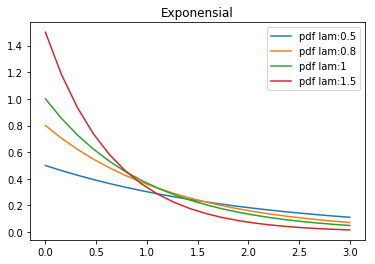

In [119]:
from scipy.stats import expon, norm, uniform
x = np.linspace(0, 3, 20)
#probability density function (pdf):
def pdf(lam, x):
    return lam * np.exp(- lam*x)

# plt.figure(figsize=(8,8))
# plt.subplot(221)
for lam in [0.5, 0.8, 1, 1.5]:
    #rv = expon()
    plt.title("Exponensial")
    plt.plot(x, pdf(lam, x), label='pdf lam:' + str(lam))
plt.legend()

<img src="./img/Exp_memory_less.png"></img>

min(S, T) = Exp(λ  + μ)

S ~ Exp(λ) and T ~ Exp(μ) be independent. Exponential race : P(S < T) = λ / (λ + μ)

In [150]:
import random
print ("When the first event occurs (per unit time)")
print (random.expovariate(1))
print (random.expovariate(2))
print (random.expovariate(4))
print (random.expovariate(8))

When the first event occurs (per unit time)
1.0599761272711217
0.9831281702922708
0.41466128869565144
0.10160028679131378


In [140]:
#Exponential distribution. lambd is 1.0 divided by the desired mean. It should be nonzero. 
#(The parameter would be called “lambda”, but that is a reserved word in Python.) 
# Returned values range from 0 to positive infinity if lambd is positive

runs = 100000
valid_pull = 0
phone_ratio_per_minute_prague = 10
phone_ratio_per_minute_brno = 4

for _ in range(runs):
    valid_pull += 1 if random.expovariate(phone_ratio_per_minute_prague) < random.expovariate(phone_ratio_per_minute_brno) else 0
    
print (valid_pull/runs)
print ("By equation", phone_ratio_per_minute_prague/(phone_ratio_per_minute_prague + phone_ratio_per_minute_brno))

0.7138
By equation 0.7142857142857143


## Random vectors


In [155]:
import numpy as np
numBins = 10  # number of bins in each dimension
data = np.random.randn(100, 2)  # generate 100000 3-d random data points
jointProbs, edges = np.histogramdd(data, bins=numBins)
jointProbs /= jointProbs.sum()
print(jointProbs)

[[ 0.    0.    0.    0.02  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.01  0.    0.    0.    0.01  0.    0.  ]
 [ 0.    0.    0.    0.01  0.    0.02  0.    0.    0.01  0.  ]
 [ 0.01  0.    0.01  0.    0.04  0.03  0.02  0.01  0.    0.  ]
 [ 0.01  0.01  0.01  0.04  0.06  0.05  0.04  0.02  0.01  0.01]
 [ 0.    0.01  0.02  0.02  0.05  0.03  0.01  0.04  0.03  0.01]
 [ 0.    0.01  0.02  0.02  0.05  0.01  0.03  0.03  0.    0.  ]
 [ 0.    0.01  0.01  0.    0.02  0.01  0.03  0.01  0.    0.  ]
 [ 0.    0.    0.    0.    0.03  0.    0.    0.01  0.    0.  ]
 [ 0.    0.    0.01  0.    0.    0.    0.01  0.    0.    0.  ]]
